<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Kuis%202%20PCVK/Percobaan_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [13]:
!kaggle datasets download zulfafebriana/dataset-hewan-ternak

Dataset URL: https://www.kaggle.com/datasets/zulfafebriana/dataset-hewan-ternak
License(s): unknown
dataset-hewan-ternak.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!unzip dataset-hewan-ternak.zip

Archive:  dataset-hewan-ternak.zip
replace Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (100).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (100).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (81).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (82).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (83).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (84).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (85).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (86).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (87).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (88).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (89).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (90).JPG  
  inflating: Dataset Daging Hewan Ternak/Testing/Ayam/Ayam (91).JPG  
  inflating: Datase

Found 192 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3414 - loss: 1.1511 - val_accuracy: 0.6250 - val_loss: 0.9498
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7009 - loss: 0.7399 - val_accuracy: 0.7917 - val_loss: 0.5883
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7337 - loss: 0.7937 - val_accuracy: 0.7708 - val_loss: 0.7093
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7910 - loss: 0.5821 - val_accuracy: 0.8333 - val_loss: 0.4432
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch

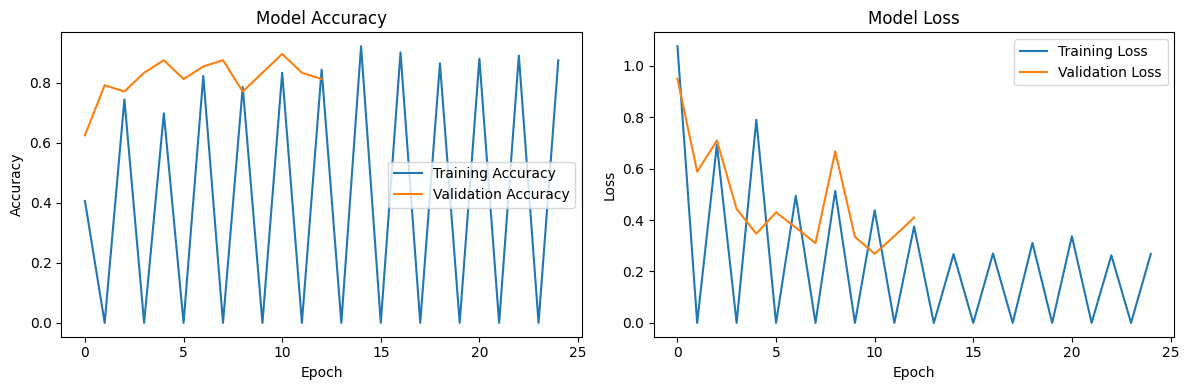

Model saved as 'daging_cnn_model.h5'.


In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set direktori dataset
train_dir = '/content/Dataset Daging Hewan Ternak/Trainning'
test_dir = '/content/Dataset Daging Hewan Ternak/Testing'

selected_classes = ['Ayam', 'Kambing', 'Sapi']

img_height, img_width = 128, 128
batch_size = 12
num_classes = len(selected_classes)

# Data Augmentation dan Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk training dan validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=selected_classes,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=selected_classes,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=selected_classes,
    class_mode='categorical'
)

# Model CNN
model = models.Sequential([
    layers.Conv2D(48, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(96, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
epochs = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluasi
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot Hasil Training
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

# Save Plot as PNG
save_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/history_percobaan_A.png'
plt.savefig(save_path)
print(f"Training history plot saved as {save_path}")

# Show Plot
plt.show()

# Save Model
model.save("daging_cnn_model.h5")
print("Model saved as 'daging_cnn_model.h5'.")

Saving Kambing (9).jpg to Kambing (9) (2).jpg
Saving Sapi (9).JPG to Sapi (9) (2).JPG
Saving object6.jpg to object6 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


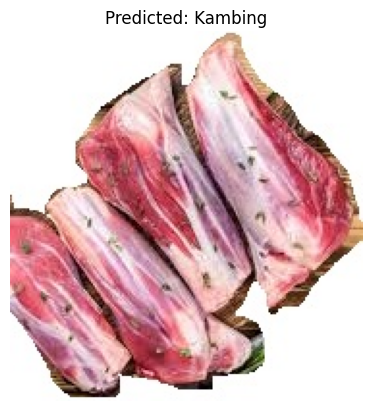

The predicted class for the image is: Kambing
Class probabilities:
Ayam: 0.08%
Kambing: 69.96%
Sapi: 29.96%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


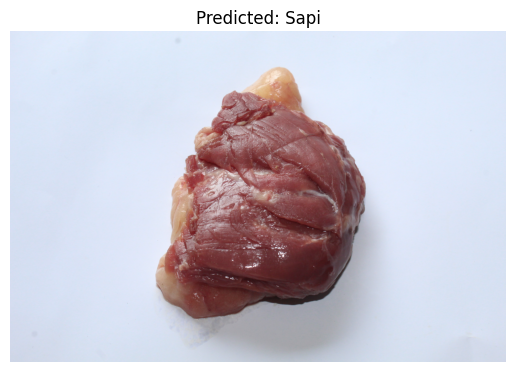

The predicted class for the image is: Sapi
Class probabilities:
Ayam: 0.10%
Kambing: 0.74%
Sapi: 99.16%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


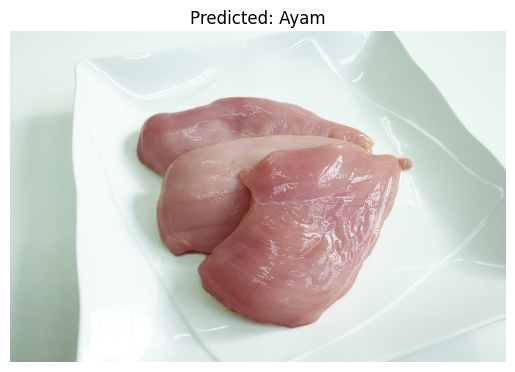

The predicted class for the image is: Ayam
Class probabilities:
Ayam: 78.66%
Kambing: 0.48%
Sapi: 20.86%
Prediction results plot saved as /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/prediction_percobaan_A.png


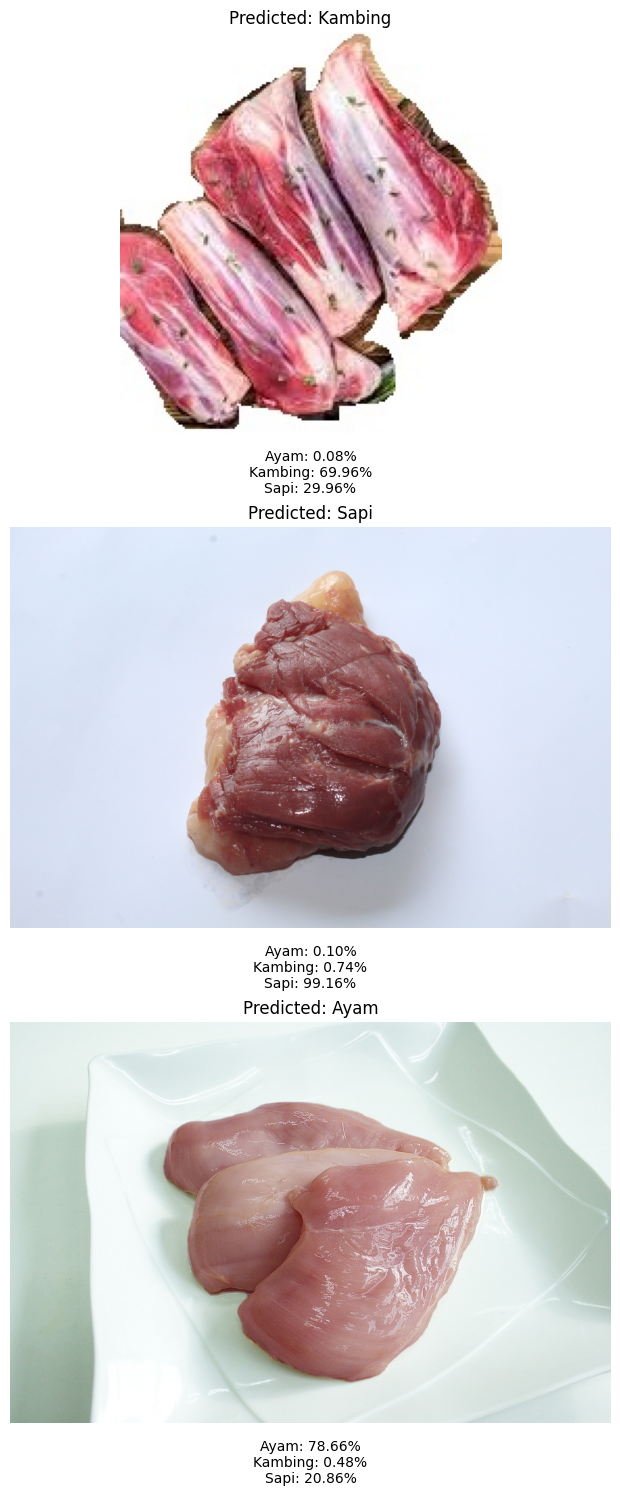

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from io import BytesIO

# Load the pre-trained model
model = load_model('daging_cnn_model.h5')
class_names = ['Ayam', 'Kambing', 'Sapi']

# Preprocess the image for prediction
def preprocess_image(image, target_size=(128, 128)):
    img = cv2.imdecode(np.frombuffer(image, np.uint8), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Predict the image's class
def predict_image(image):
    img = preprocess_image(image)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]

    probabilities = predictions[0]
    class_probabilities = {class_names[i]: probabilities[i] for i in range(len(class_names))}

    return class_names[predicted_class], class_probabilities

# Display the uploaded image
def display_image(image, predicted_class, class_probabilities):
    img = cv2.imdecode(np.frombuffer(image, np.uint8), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image and predictions
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    print(f'The predicted class for the image is: {predicted_class}')
    print("Class probabilities:")
    for class_name, probability in class_probabilities.items():
        print(f"{class_name}: {probability * 100:.2f}%")

# Upload the images using Google Colab's file upload
uploaded = files.upload()

# Initialize a list to store the results for saving later
prediction_results = []

# Process the uploaded images
for image_name in uploaded.keys():
    # Read the image content
    uploaded_image = uploaded[image_name]

    # Predict and display results
    predicted_class, class_probabilities = predict_image(uploaded_image)

    # Display the image and results
    display_image(uploaded_image, predicted_class, class_probabilities)

    # Store the image and results for saving to a file
    prediction_results.append((image_name, predicted_class, class_probabilities))

# Save Prediction Results Plot
fig, axes = plt.subplots(len(uploaded), 1, figsize=(10, 5 * len(uploaded)))

# If there is only one image, axes is not a list but a single object
if len(uploaded) == 1:
    axes = [axes]

# Loop over images and display results on the plot
for i, (image_name, predicted_class, class_probabilities) in enumerate(prediction_results):
    img = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {predicted_class}")

    # Add probabilities to the plot
    prob_text = "\n".join([f"{class_name}: {probability * 100:.2f}%" for class_name, probability in class_probabilities.items()])
    axes[i].text(0.5, -0.1, prob_text, ha='center', va='center', transform=axes[i].transAxes, fontsize=10)

# Adjust layout and save the plot
plt.tight_layout()
save_path = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/prediction_percobaan_A.png'
plt.savefig(save_path)
print(f"Prediction results plot saved as {save_path}")

# Show plot
plt.show()
